### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа:   НФИбд-01-21

## Москва 2024
***

## Вариант № 28 

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# считываем данные из репозитария UCI
url = 'hepatitis.data'
my_data = pd.read_csv(url, header=None)
my_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [3]:
my_data = my_data.rename(columns={19: "class"})
my_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.

In [4]:
# среди меток класса отсуствуют пропущенные значения

my_data['class'].isnull().sum(axis=0)

0

In [5]:
# расмотрим число уникальных значений, их не больше 2

len(my_data['class'].unique())

2

In [6]:
value_counts = my_data['class'].value_counts()
print(value_counts)

1    85
2    70
Name: class, dtype: int64


3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.

In [7]:
# проверка типов данных

my_data.dtypes

0         int64
1         int64
2         int64
3        object
4         int64
5        object
6        object
7        object
8        object
9        object
10       object
11       object
12       object
13       object
14       object
15       object
16       object
17       object
18       object
class     int64
dtype: object

In [8]:
my_data[:19] = my_data[:19].replace('?', np.nan) 

In [9]:
my_data = my_data.drop(my_data.columns[0], axis=1)
my_data.dtypes

1         int64
2         int64
3        object
4         int64
5        object
6        object
7        object
8        object
9        object
10       object
11       object
12       object
13       object
14       object
15       object
16       object
17       object
18       object
class     int64
dtype: object

In [10]:
for col in my_data.columns[:19]:
    my_data[col] = pd.to_numeric(my_data[col], errors='coerce')

# замена NaN на средние значения для каждого класса
for col in my_data.columns[:19]:
    my_data[col] = my_data.groupby('class')[col].transform(lambda x: x.fillna(x.mean()))
    
my_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,68.040000,1
1,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,68.040000,1
2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,68.040000,1
3,31,1,1.547619,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,92.666667,200.0,4.0,68.040000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.000000,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,122.203704,242.0,3.3,50.000000,2
151,44,1,2.000000,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,53.710526,2
152,61,1,1.000000,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,53.710526,2
153,53,2,1.000000,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2


In [143]:
# проверка новых типов данных: классов object больше не обнаружено
# имеет только int и float
my_data.dtypes

1          int64
2          int64
3        float64
4          int64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
class      int64
dtype: object

In [144]:
columns_to_process = [1, 2, 4, 'class']
my_data[columns_to_process] = my_data[columns_to_process].astype(float) # приведем всё к float

In [145]:
my_data.isnull().sum(axis=0) # проверка на пропущенные значения

1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
class    0
dtype: int64

In [146]:
my_data.dtypes

1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
class    float64
dtype: object

4. Выполните стандартизацию признаков набора данных.

In [147]:
y = my_data['class']
X = my_data.drop(columns='class')
X.shape, y.shape

((155, 18), (155,))

In [148]:
from sklearn import preprocessing
X1 = X.to_numpy()
X_scaled = preprocessing.scale(X1)
new_data = pd.DataFrame(X_scaled)
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.894192,2.947457,-1.016867,0.428026,1.364259,0.811637,0.513333,-2.263203,0.881151,0.504391,0.722179,0.392082,0.368521,-0.357905,-0.449696,-0.768248,0.294356,0.364066
1,0.702579,-0.339276,-1.016867,0.428026,-0.738079,0.811637,0.513333,-2.263203,0.881151,0.504391,0.722179,0.392082,0.368521,-0.442220,0.620704,-0.496175,-0.514111,0.364066
2,2.938059,-0.339276,0.989742,0.428026,-0.738079,0.811637,0.513333,0.473361,0.881151,0.504391,0.722179,0.392082,0.368521,-0.610850,-0.214208,-0.609539,0.294356,0.364066
3,-0.814353,-0.339276,0.081990,-2.336308,1.364259,0.811637,0.513333,0.473361,0.881151,0.504391,0.722179,0.392082,0.368521,-0.610850,-1.284607,-0.382812,0.294356,1.036910
4,-0.574838,-0.339276,0.989742,0.428026,1.364259,0.811637,0.513333,0.473361,0.881151,0.504391,0.722179,0.392082,0.368521,-0.357905,-0.285568,1.294972,0.294356,0.364066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.383225,-0.339276,0.989742,0.428026,-0.738079,-1.239510,-1.959325,0.473361,0.881151,0.504391,-1.419659,-2.592879,-2.753556,5.206887,0.346761,1.771100,-0.837497,-0.650826
151,0.223548,-0.339276,0.989742,0.428026,-0.738079,0.811637,0.513333,0.473361,-1.220056,0.504391,0.722179,0.392082,0.368521,-0.442220,0.428032,0.637462,0.779436,-0.442080
152,1.580803,-0.339276,-1.016867,0.428026,-0.738079,-1.239510,0.513333,-2.263203,-1.220056,0.504391,-1.419659,0.392082,0.368521,-0.526535,-0.663775,-0.745576,0.456049,-0.442080
153,0.942095,2.947457,-1.016867,0.428026,-0.738079,0.811637,0.513333,0.473361,0.881151,-2.035284,-1.419659,0.392082,-2.753556,0.063670,-0.535328,-0.756912,0.456049,-0.763342


5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

Метод отбора признаков – одномерный отбор признаков (SelectKBest) 

In [149]:
from sklearn.feature_selection import SelectKBest, f_classif

valid_columns = [col for col in new_data.columns[:17] if new_data[col].nunique() > 10 and col < 17]

selector = SelectKBest(score_func=f_classif, k=2) 
X_new = selector.fit_transform(X,y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Номера выбранных признаков:", selected_features)

Номера выбранных признаков: Index([13, 18], dtype='object')


In [150]:
# проверка, имеет ли признак больше 10 различных значений
len(new_data[13].unique()) 

36

In [151]:
# проверка, имеет ли признак больше 10 различных значений
len(new_data[17].unique())

46

In [152]:
# оставляем 2 наиболее значимых признака
data2 = new_data[[13,17]]

6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [153]:
y_int = y.astype(int)

In [154]:
y_int.value_counts()

1    85
2    70
Name: class, dtype: int64

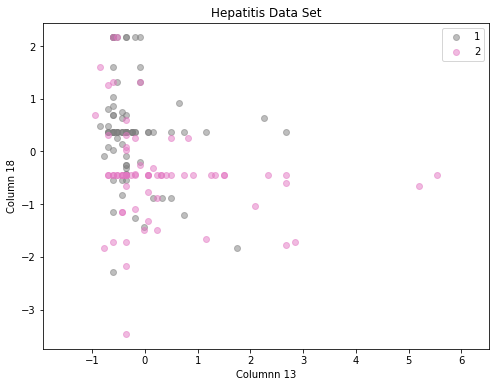

In [155]:
plt.figure(figsize=(8, 6))
colors = ['tab:grey', 'tab:pink']
markers = ['o', 'o']

for clr in y_int.unique():
    xx = data2[13].loc[y==clr]
    yy = data2[17].loc[y==clr]
    plt.scatter(xx, yy, c = colors[clr-1], label=clr,
                marker=markers[clr-1], alpha=0.5)
plt.axis('equal')
plt.title('Hepatitis Data Set')
plt.xlabel('Columnn 13')
plt.ylabel('Column 18')
plt.legend()

7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.

Модели классификации: 

-       наивный байесовский классификатор 

-       классификатор метода опорных векторов   

-       классификатор метода опорных векторов с полиномиальными зависимостями (degree=2) 

In [156]:
# разделение набора на выборки
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """returns X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [157]:
X_train, X_test, y_train, y_test = train_test_split(data2.to_numpy(), y, 0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((109, 2), (109,), (46, 2), (46,))

In [158]:
# наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred_nbc = nbc.predict(X_test)

In [159]:
# классификатор метода опорных векторов   
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [160]:
# классификатор метода опорных векторов с полиномиальными зависимостями (degree=2) 
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.

In [161]:
data2_np = data2.to_numpy()

In [162]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

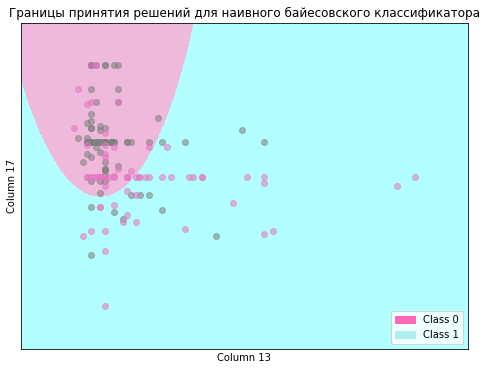

In [163]:
h = 0.01
x_min, x_max = data2_np[:, 0].min() - 1, data2_np[:, 0].max() + 1
y_min, y_max = data2_np[:, 1].min() - 1, data2_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = nbc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_decision = ListedColormap(['#C71585', '#00FFFF'])

# границы принятия решения
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=cmap_decision, alpha=0.3)

colors = ['tab:grey', 'tab:pink']
markers = ['o', 'o']

for clr in y_int.unique():
    xx = data2[13].loc[y==clr]
    yy = data2[17].loc[y==clr]
    plt.scatter(xx, yy, c = colors[clr-1], label=clr,
                marker=markers[clr-1], alpha=0.55)

legend_class0 = mpatches.Patch(color='#FF69B4', label='Class 0')
legend_class1 = mpatches.Patch(color='#AFEEEE', label='Class 1')

plt.legend(handles=[legend_class0, legend_class1], loc='lower right')

plt.title("Границы принятия решений для наивного байесовского классификатора")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Column 13')  # Подпись оси X
plt.ylabel('Column 17')  # Подпись оси Y
plt.xticks(())
plt.yticks(())

plt.show()

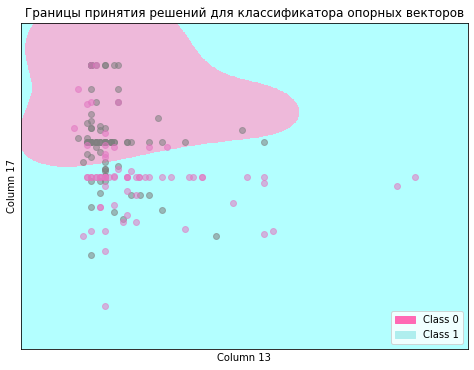

In [164]:
h = 0.01
x_min, x_max = data2_np[:, 0].min() - 1, data2_np[:, 0].max() + 1
y_min, y_max = data2_np[:, 1].min() - 1, data2_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_decision = ListedColormap(['#C71585', '#00FFFF'])

# границы принятия решения
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=cmap_decision, alpha=0.3)

colors = ['tab:grey', 'tab:pink']
markers = ['o', 'o']

for clr in y_int.unique():
    xx = data2[13].loc[y==clr]
    yy = data2[17].loc[y==clr]
    plt.scatter(xx, yy, c = colors[clr-1], label=clr,
                marker=markers[clr-1], alpha=0.55)

legend_class0 = mpatches.Patch(color='#FF69B4', label='Class 0')
legend_class1 = mpatches.Patch(color='#AFEEEE', label='Class 1')

plt.legend(handles=[legend_class0, legend_class1], loc='lower right')

plt.title("Границы принятия решений для классификатора опорных векторов")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Column 13')
plt.ylabel('Column 17')
plt.xticks(())
plt.yticks(())

plt.show()

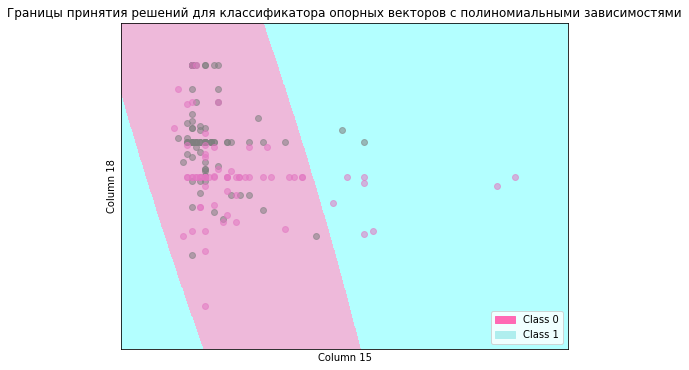

In [165]:
h = 0.01
x_min, x_max = data2_np[:, 0].min() - 1, data2_np[:, 0].max() + 1
y_min, y_max = data2_np[:, 1].min() - 1, data2_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_decision = ListedColormap(['#C71585', '#00FFFF'])

# границы принятия решения
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=cmap_decision, alpha=0.3)

colors = ['tab:grey', 'tab:pink']
markers = ['o', 'o']

for clr in y_int.unique():
    xx = data2[13].loc[y==clr]
    yy = data2[17].loc[y==clr]
    plt.scatter(xx, yy, c = colors[clr-1], label=clr,
                marker=markers[clr-1], alpha=0.55)

legend_class0 = mpatches.Patch(color='#FF69B4', label='Class 0')
legend_class1 = mpatches.Patch(color='#AFEEEE', label='Class 1')

plt.legend(handles=[legend_class0, legend_class1], loc='lower right')

plt.title("Границы принятия решений для классификатора опорных векторов с полиномиальными зависимостями")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Column 15')
plt.ylabel('Column 18')
plt.xticks(())
plt.yticks(())

plt.show()

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.

Кривая для визуализации - ROC-кривая

In [166]:
from sklearn.svm import SVC

# Линейная SVM с включенным предсказанием вероятностей
svm = SVC(probability=True, kernel='linear', random_state=42)

# Полиномиальная SVM с включенным предсказанием вероятностей
svm_poly = SVC(probability=True, kernel='poly', degree=3, random_state=42)

# Обучение моделей
svm.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

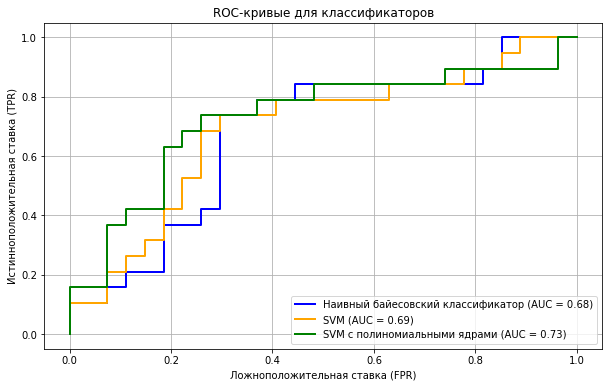

In [167]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Пример создания моделей (обязательно убедитесь, что они у вас созданы аналогичным образом)
# Линейная SVM с включенным предсказанием вероятностей
svm = SVC(probability=True, kernel='linear', random_state=42)

# Полиномиальная SVM с включенным предсказанием вероятностей
svm_poly = SVC(probability=True, kernel='poly', degree=3, random_state=42)

# Наивный байесовский классификатор
nbc = GaussianNB()

# Обучение моделей
svm.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
nbc.fit(X_train, y_train)

# Получаем вероятности предсказаний
y_prob_nbc = nbc.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_svm_poly = svm_poly.predict_proba(X_test)[:, 1]

# Преобразование меток к значениям {0, 1}
y_test_binary = (y_test == 2).astype(int)  # Предположим, что метка "2" — это положительный класс

# Вычисляем ROC-кривые для всех классификаторов
fpr_nbc, tpr_nbc, _ = roc_curve(y_test_binary, y_prob_nbc)
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_prob_svm)
fpr_svm_poly, tpr_svm_poly, _ = roc_curve(y_test_binary, y_prob_svm_poly)

# Вычисляем AUC (площадь под кривой)
roc_auc_nbc = auc(fpr_nbc, tpr_nbc)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_svm_poly = auc(fpr_svm_poly, tpr_svm_poly)

# Строим ROC-кривые
plt.figure(figsize=(10, 6))
plt.plot(fpr_nbc, tpr_nbc, color='blue', lw=2, label='Наивный байесовский классификатор (AUC = {:.2f})'.format(roc_auc_nbc))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_svm_poly, tpr_svm_poly, color='green', lw=2, label='SVM с полиномиальными ядрами (AUC = {:.2f})'.format(roc_auc_svm_poly))

# Настраиваем график
plt.xlabel('Ложноположительная ставка (FPR)')
plt.ylabel('Истинноположительная ставка (TPR)')
plt.title('ROC-кривые для классификаторов')
plt.legend(loc='lower right')
plt.grid()
plt.show()

10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

In [168]:
# Определяем лучший метод по AUC
best_auc = max(roc_auc_nbc, roc_auc_svm, roc_auc_svm_poly)

if best_auc == roc_auc_nbc:
    best_model = "Наивный байесовский классификатор"
elif best_auc == roc_auc_svm:
    best_model = "классификатор метода опорных векторов"
else:
    best_model = "классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)"

print(f"Лучший метод: с AUC: {best_model}")


Лучший метод: с AUC: классификатор метода опорных векторов с полиномиальными зависимостями (degree=2)
